In [59]:
# Importing libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

# For visualisation
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from IPython.display import Image  
from subprocess import call

In [60]:
titanic_df = pd.read_csv("titanic.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [61]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [62]:
# Remove columns Cabin, Ticket, and Name as they are not useful for prediction
titanic_df.drop("Cabin", axis=1, inplace=True)
titanic_df.drop("Ticket", axis=1, inplace=True)
titanic_df.drop("Name", axis=1, inplace=True)
titanic_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


### One-Hot Encoding
One-hot encoding is a technique used to ensure that categorical variables are better represented in the machine. Let's take a look at the "Sex" column

In [63]:
titanic_df["Sex"].unique()

array(['male', 'female'], dtype=object)

Machine Learning classifiers don't know how to handle strings. As a result, you need to convert it into a categorical representation. There are two main ways to go about this:

Label Encoding: Assigning, for example, 0 for "male" and 1 for "female". The problem here is it intrinsically makes one category "larger than" the other category.

One-hot encoding: Assigning, for example, [1, 0] for "male" and [0, 1] for female. In this case, you have an array of size (n_categories,) and you represent a 1 in the correct index, and 0 elsewhere. In Pandas, this would show as extra columns. For example, rather than having a "Sex" column, it would be a "Sex_male" and "Sex_female" column. Then, if the person is male, it would simply show as a 1 in the "Sex_male" column and a 0 in the "Sex_female" column.

There is a nice and easy method that does this in pandas: get_dummies()

In [64]:
titanic_df = pd.get_dummies(titanic_df, prefix="Sex", columns=["Sex"])
titanic_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
0,1,0,3,22.0,1,0,7.2500,S,False,True
1,2,1,1,38.0,1,0,71.2833,C,True,False
2,3,1,3,26.0,0,0,7.9250,S,True,False
3,4,1,1,35.0,1,0,53.1000,S,True,False
4,5,0,3,35.0,0,0,8.0500,S,False,True


Now, we do the same to the "Embarked" column.

In [65]:
titanic_df = pd.get_dummies(titanic_df, prefix="Embarked", columns=["Embarked"])
titanic_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,False,True,False,False,True
1,2,1,1,38.0,1,0,71.2833,True,False,True,False,False
2,3,1,3,26.0,0,0,7.9250,True,False,False,False,True
3,4,1,1,35.0,1,0,53.1000,True,False,False,False,True
4,5,0,3,35.0,0,0,8.0500,False,True,False,False,True


In [66]:
# Having imported and cleaned the data we can now split it into a training, development and test set.
# We will use 60% of the data for training, 20% for development and 20% for testing.

X = titanic_df.drop("Survived", axis=1)
y = titanic_df["Survived"]

r=42
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=r)
X_train, X_dev, y_train, y_dev = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=r)


In [67]:
# Training a model without pruning
unpruned = DecisionTreeClassifier(max_depth=None, random_state=r)   # No pruning
unpruned.fit(X_train, y_train)
print("Performance without pruning:", unpruned.score(X_test, y_test))
print("At depth:", unpruned.tree_.max_depth)

Performance without pruning: 0.7262569832402235
At depth: 15


Best depth after pruning: 3
Performance on development set at best depth: 0.8321678321678322


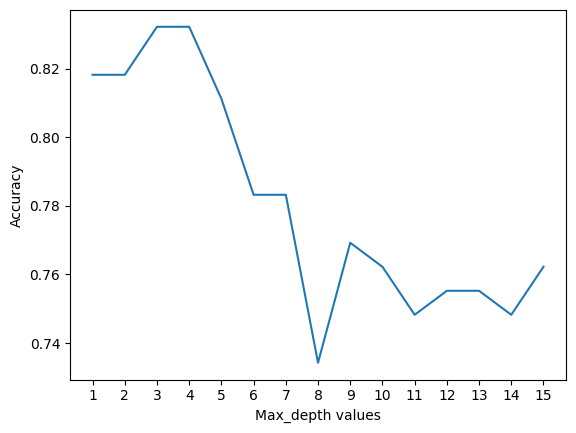

In [68]:
# Introduce pruning to assess the performance of the model
# We will use the development set to find the best max_depth value for pruning

pruned_depths = range(1,unpruned.tree_.max_depth+1)

best_depth = 1
best_score = 0

pruned_scores = [] 
for depth in pruned_depths:
  clf = DecisionTreeClassifier(max_depth=depth, random_state=r) # Create a new classifier with the current depth
  clf.fit(X_train, y_train) # Fit the classifier to the training data
  score = clf.score(X_dev, y_dev) # Evaluate the classifier on the development set
  if score > best_score:  # If the score is better than the best score so far, update the best score and depth
        best_score = score
        best_depth = depth
  pruned_scores.append(score) # Store the score for the current depth

print(f"Best depth after pruning: {best_depth}")
print(f"Performance on development set at best depth: {best_score}")

fig, ax = plt.subplots()
ax.plot(pruned_depths, pruned_scores)
plt.xlabel("Max_depth values")
plt.ylabel("Accuracy")
ax.xaxis.set_ticks(pruned_depths)
plt.show()

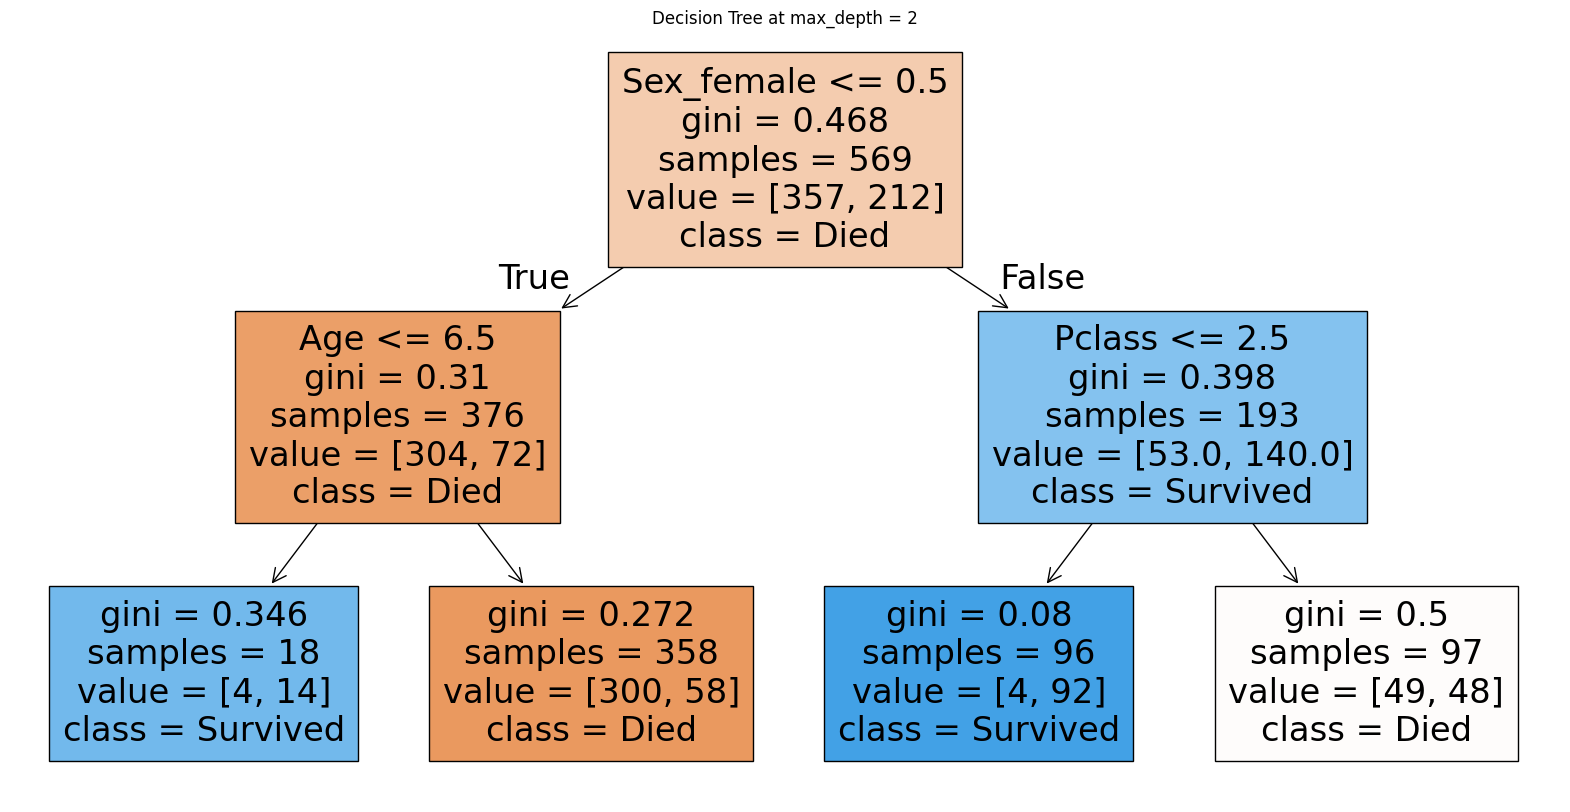

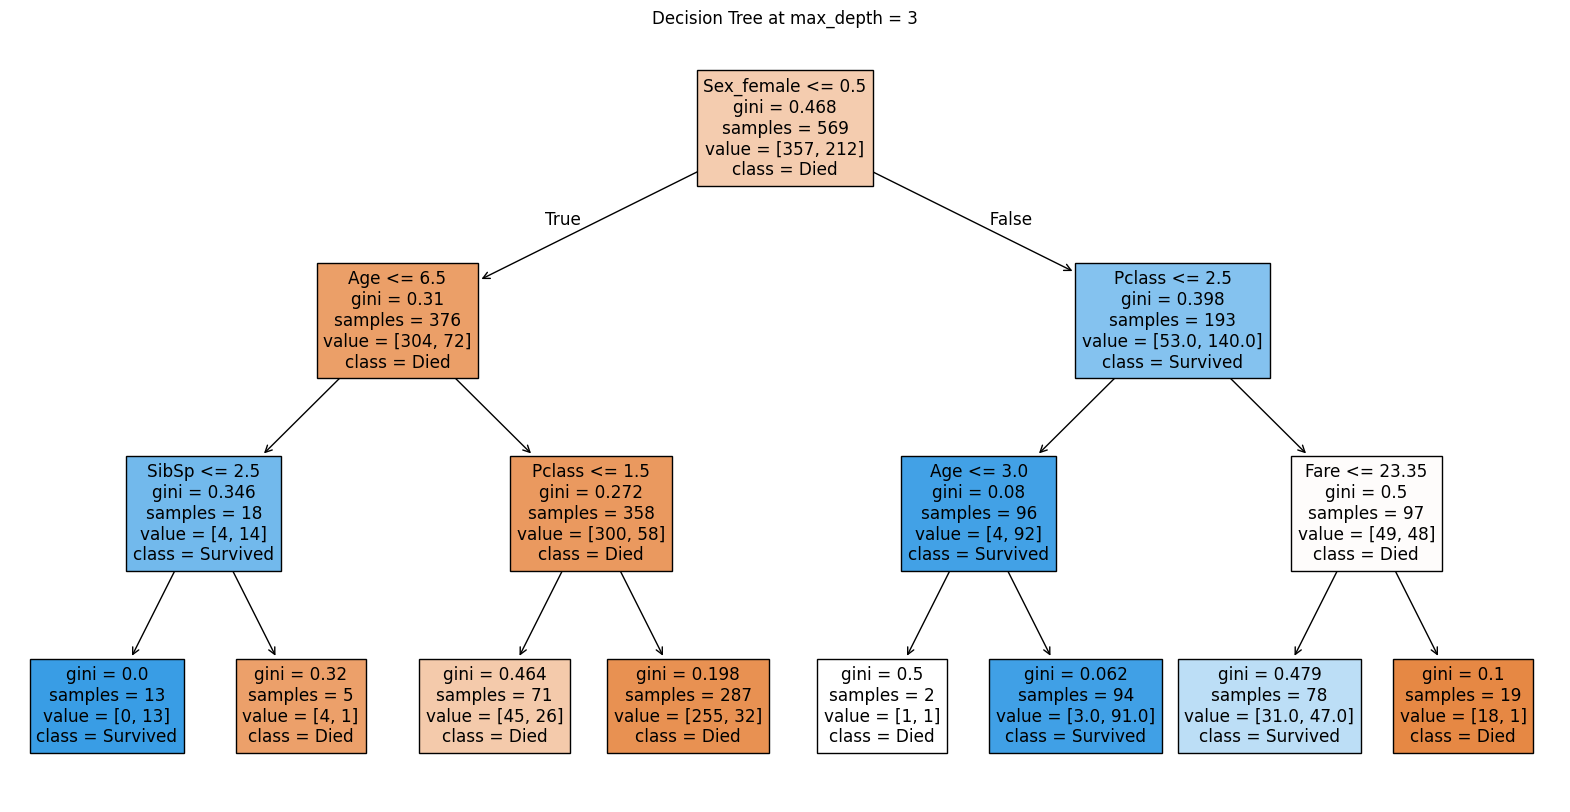

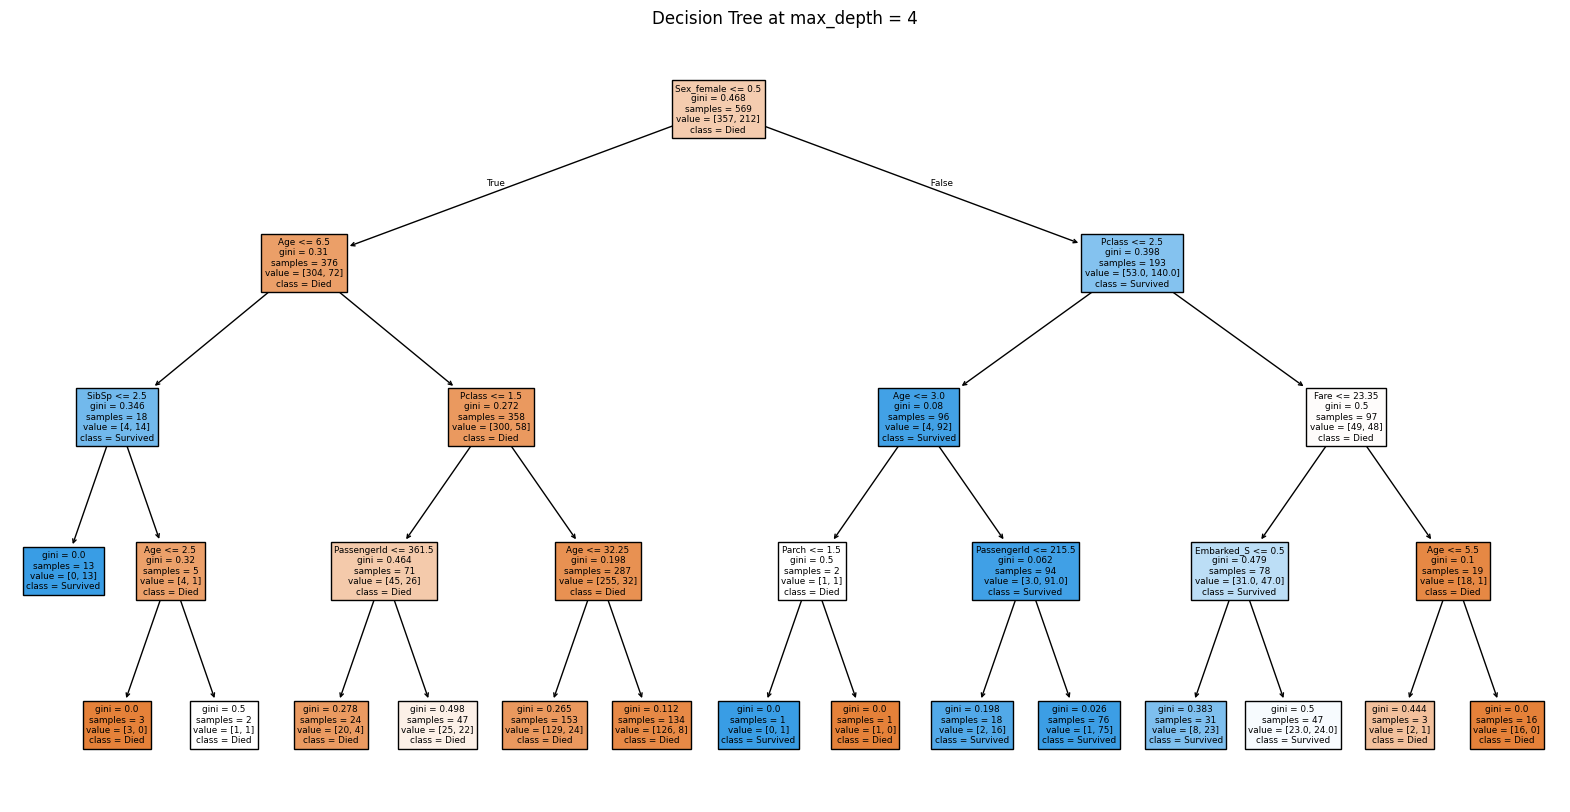

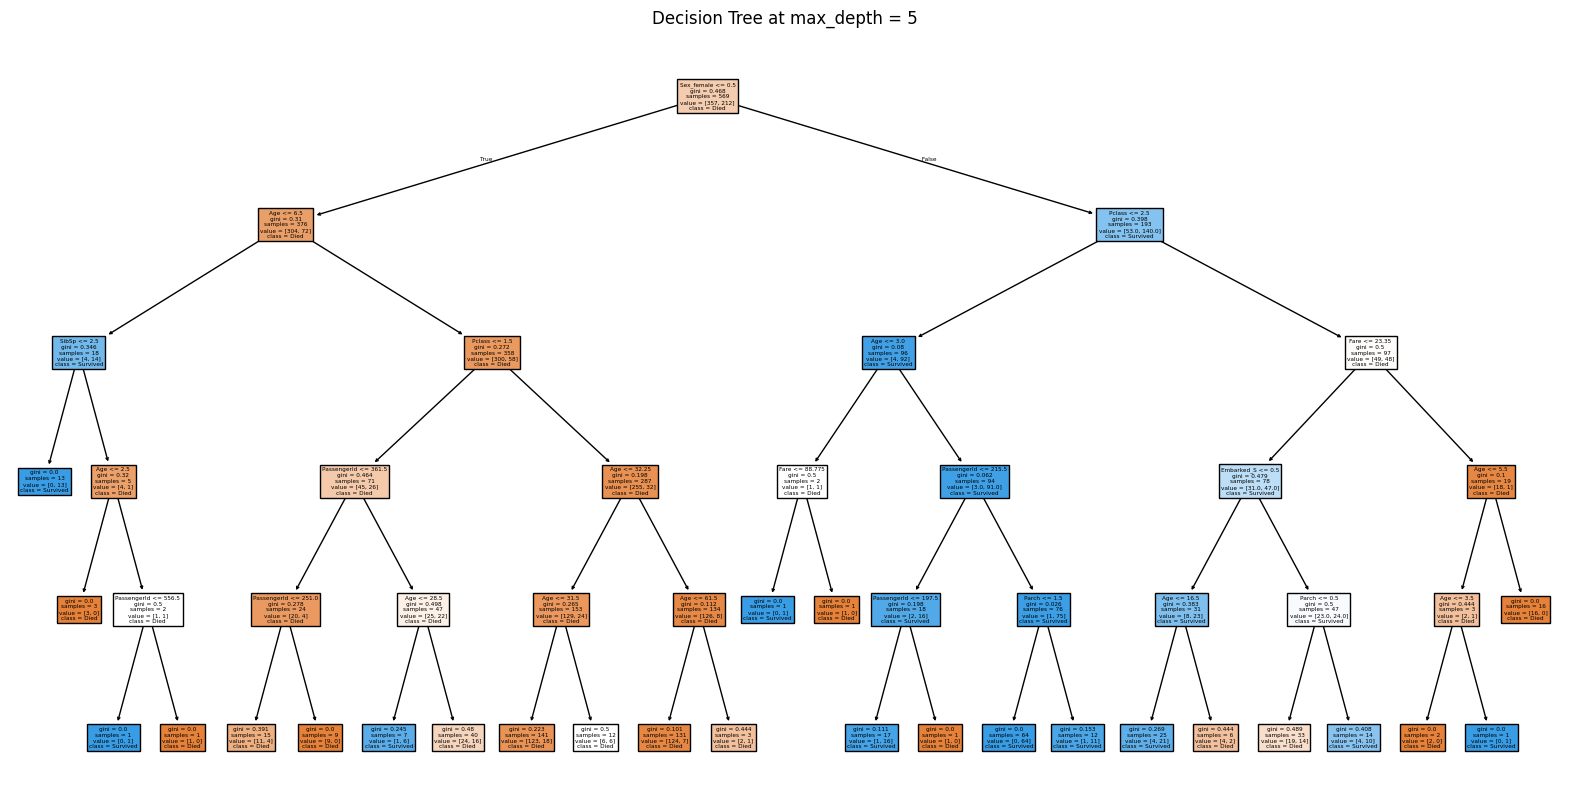

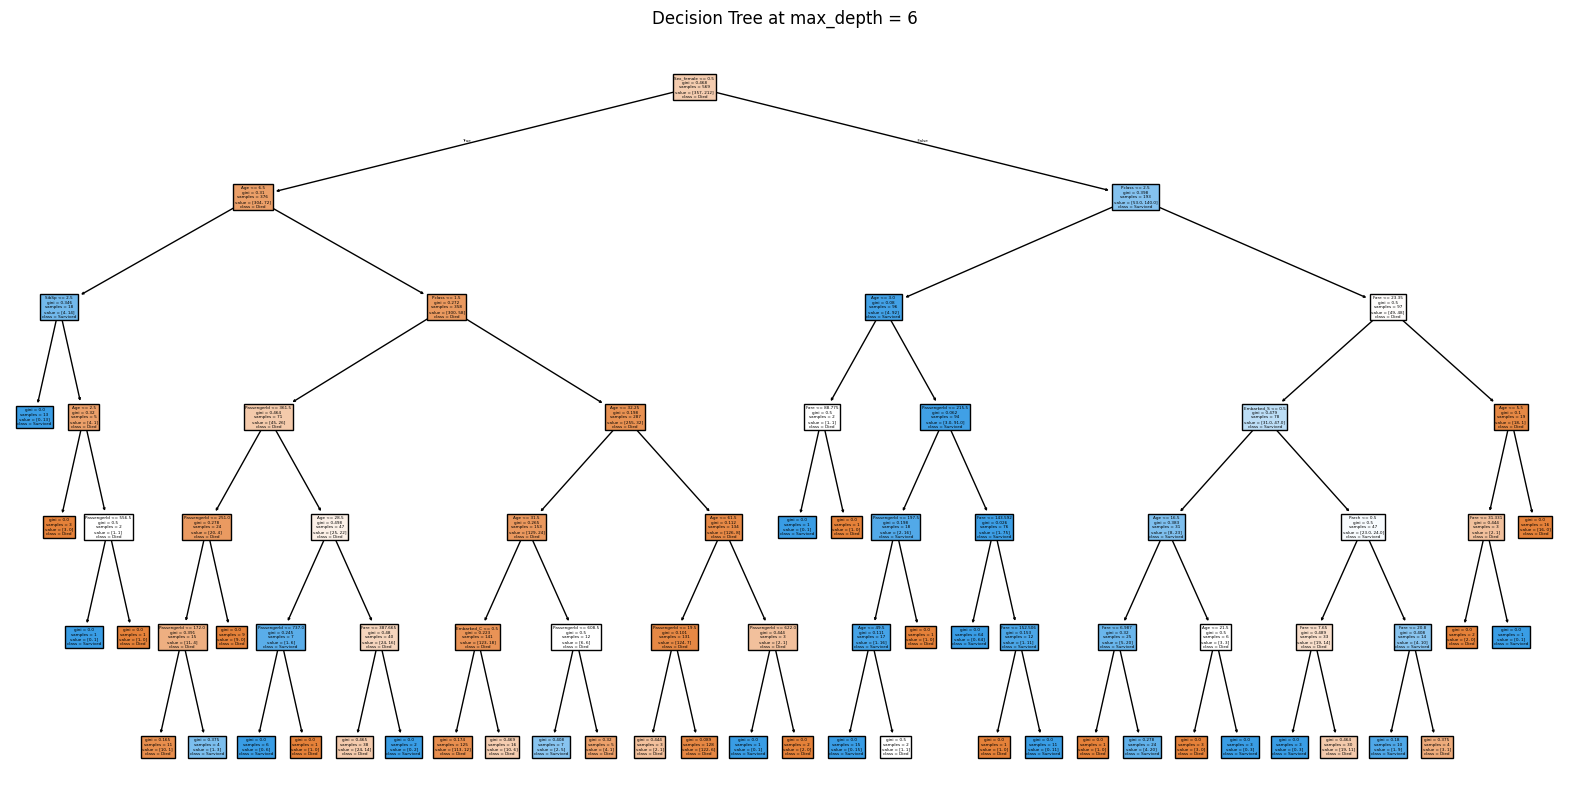

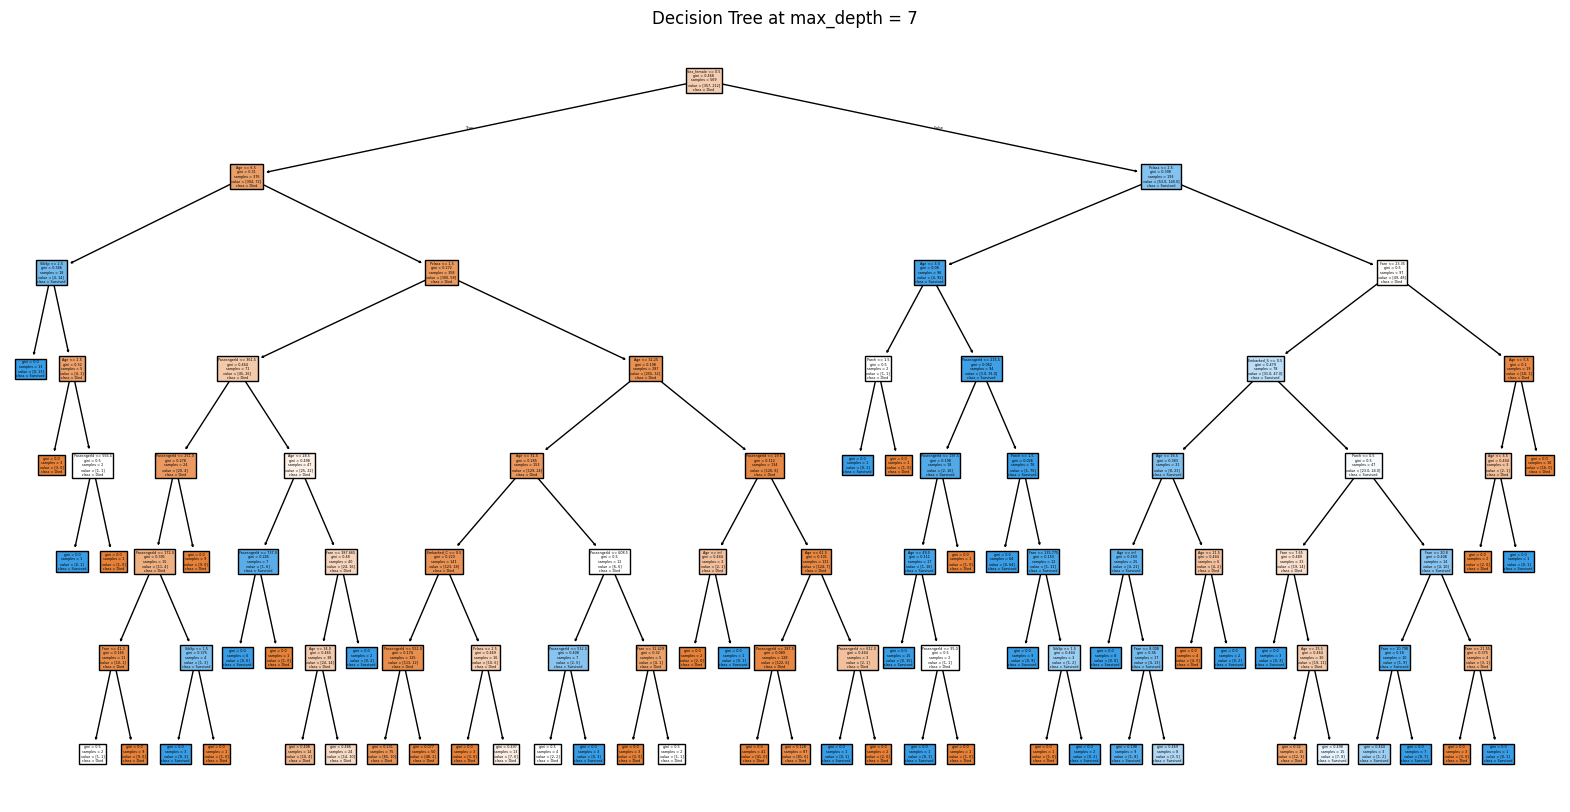

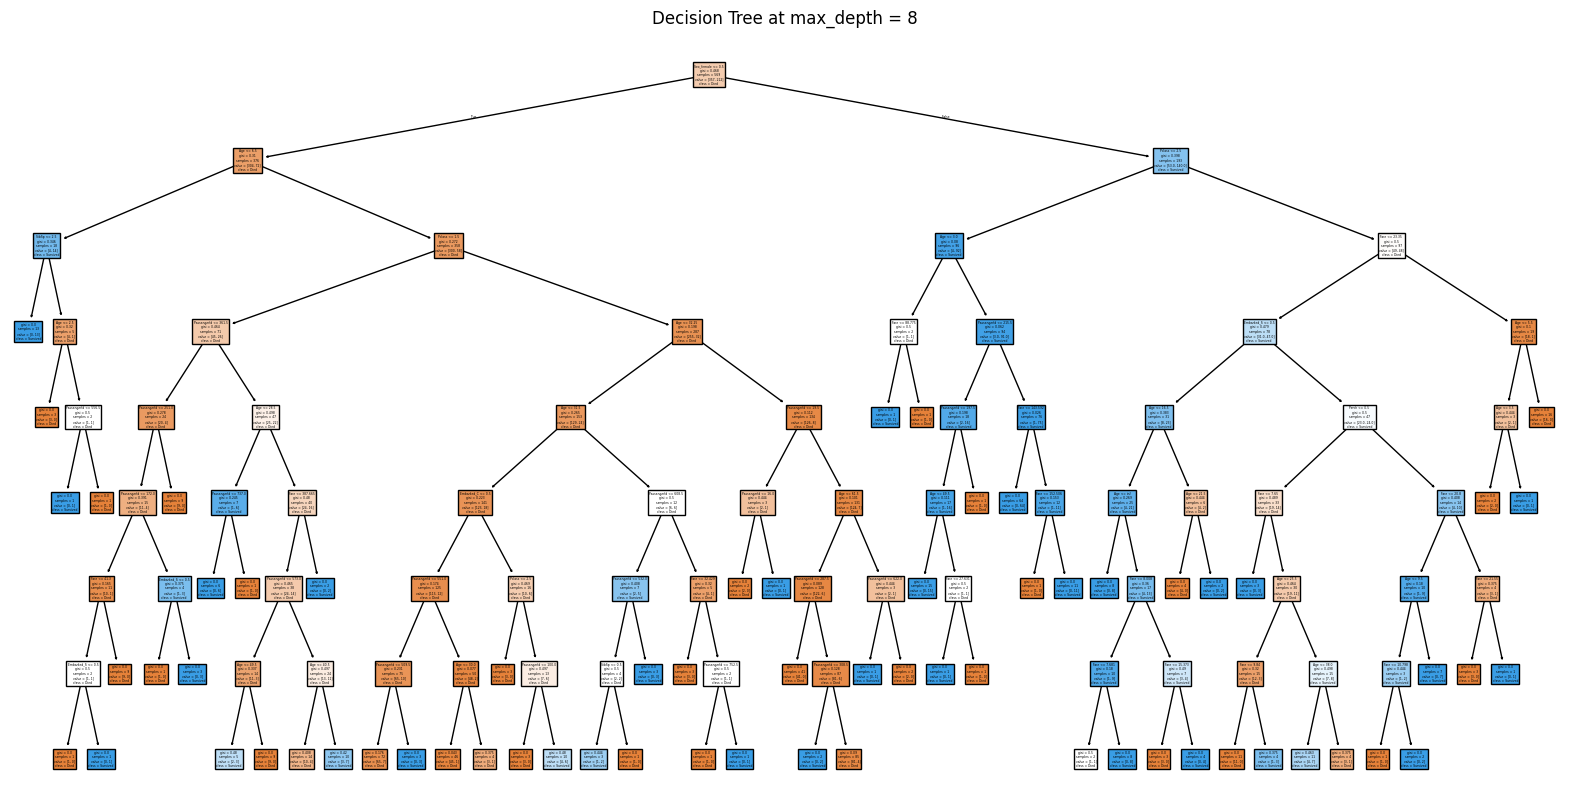

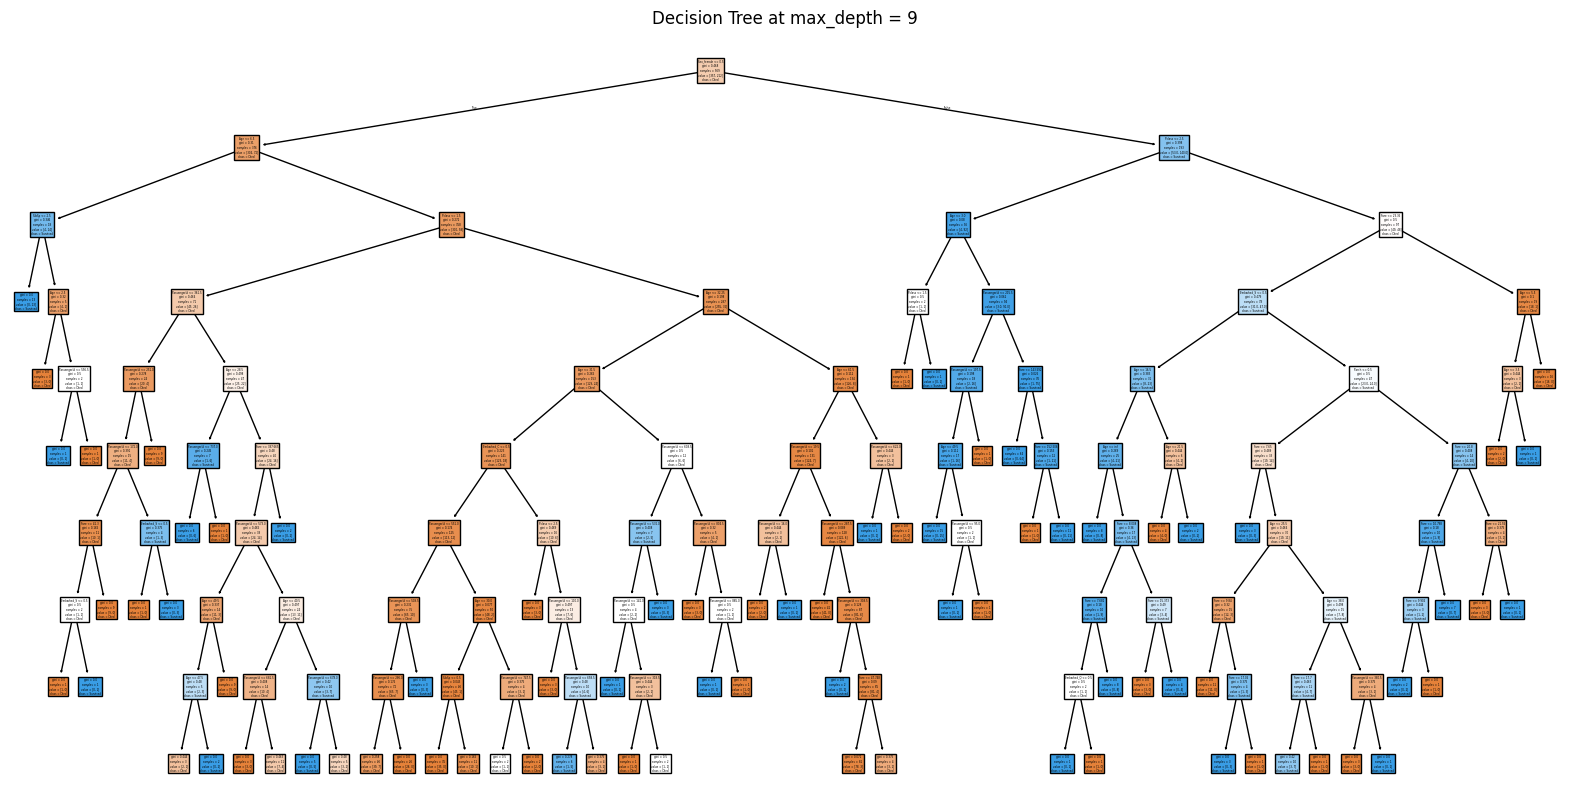

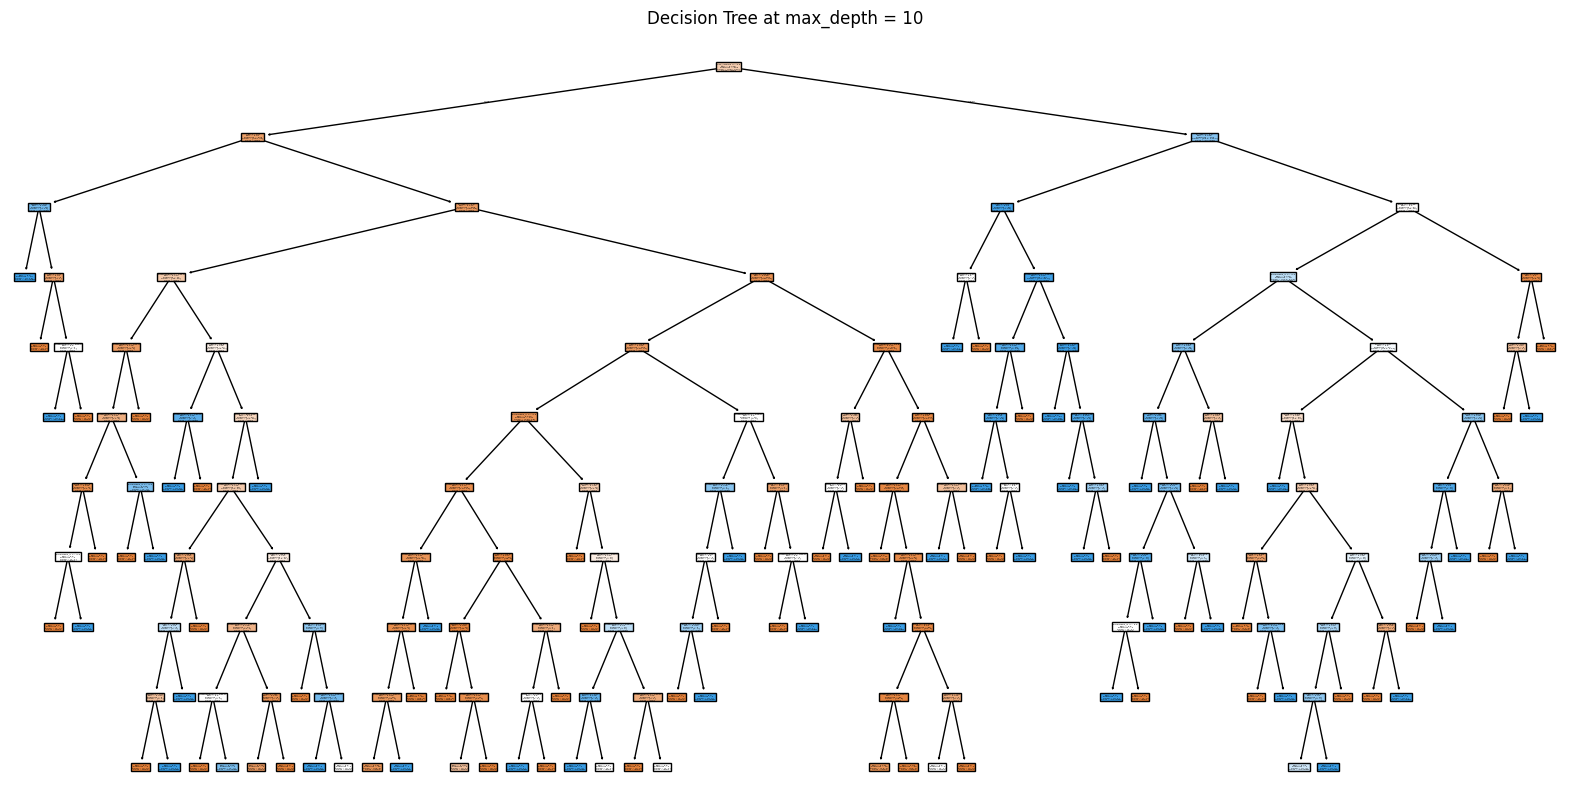

In [69]:
# Build the model with different values of the max_depth from 2 to 10. At each step, create a plot of the tree and store the accuracies on both the
# training and development data

train_accuracies = []   # List to store training accuracies
dev_accuracies = [] # List to store development accuracies
depth_range = range(2, 11)  # Range of depths to evaluate

# Loop through the specified depth range and train a Decision Tree Classifier for each depth
for depth in depth_range:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=r) # Create a new classifier with the current depth
    clf.fit(X_train, y_train)   # Fit the classifier to the training data
    
    # Evaluate the classifier on both training and development sets
    train_acc = clf.score(X_train, y_train) #
    dev_acc = clf.score(X_dev, y_dev)

    train_accuracies.append(train_acc)  # Store the training accuracy
    dev_accuracies.append(dev_acc)  # Store the development accuracy

    # Plotting the tree
    plt.figure(figsize=(20,10))
    tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=["Died", "Survived"])
    plt.title(f"Decision Tree at max_depth = {depth}")
    

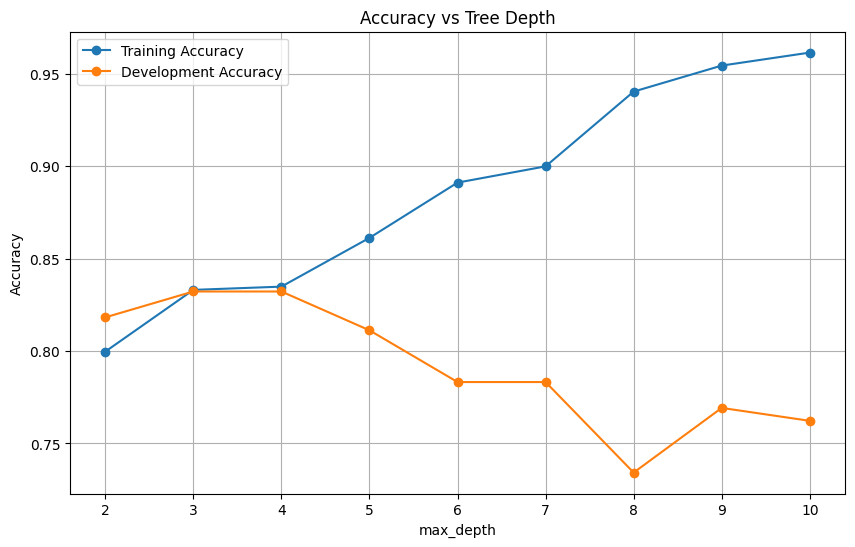

In [70]:
# Plot the accuracies for both training and development sets over Depths

plt.figure(figsize=(10, 6))
plt.plot(depth_range, train_accuracies, label="Training Accuracy", marker='o')
plt.plot(depth_range, dev_accuracies, label="Development Accuracy", marker='o')
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Tree Depth")
plt.legend()
plt.grid(True)
plt.xticks(depth_range)
plt.show()

Both lines on the graph are largely straight and fairly constant. Accuracy is similar at the initial depth of 2 and stays in line until depth hits 4.<br>
At this point the accuracy of the two data sets diverges with the the training accuracy steadily improving whilst the development accuracy degrades with significant drop at depth 8.<br>
This indicates overfitting after the max_depth of 4 ut we should look at the actual numbers more closely to determine the actual best depth

In [71]:
# Print the accuracies in a DataFrame for better readability

accuracy_df = pd.DataFrame({
    'Depth': list(depth_range),
    'Training Accuracy': train_accuracies,
    'Development Accuracy': dev_accuracies
})

# Sort by Dev Accuracy (descending) to find best-performing depths
print(accuracy_df.sort_values(by='Development Accuracy', ascending=False))

   Depth  Training Accuracy  Development Accuracy
1      3           0.833040              0.832168
2      4           0.834798              0.832168
0      2           0.799649              0.818182
3      5           0.861160              0.811189
4      6           0.891037              0.783217
5      7           0.899824              0.783217
7      9           0.954306              0.769231
8     10           0.961336              0.762238
6      8           0.940246              0.734266


As we can see the Development Accuracy is exactly the same from depth 3 to depth 4 whilst the Training Accuracy increases marginally. This suggests the overfitting of the training data increases from depth 3 to 4 so we should use max_depth 3 for the simplest yet best fitted model

In [72]:
# Calculate and report the accuracy of the final model on the test set using the best max_depth value found without pruning

# Retrain the final model on the full training + development data
X_final_train = pd.concat([X_train, X_dev])
y_final_train = pd.concat([y_train, y_dev])

final_model = DecisionTreeClassifier(max_depth=best_depth, random_state=r)
final_model.fit(X_final_train, y_final_train)

# Evaluate on the test set
test_accuracy = final_model.score(X_test, y_test)
print(f"Final test accuracy at depth {best_depth}: {test_accuracy:.4f}")

Final test accuracy at depth 3: 0.7989
